In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [9]:
# Gravidade em m/s^2
g = 9.81
# Coeficiente de restituição
α = 0.65

# Passo e tempo e tmax
tmax  = 6
dt    = 0.01
# Array de tempos
tarr = np.arange(start = 0, stop = tmax+dt, step = dt)

#Condições iniciais em m/s
x0 , y0  = 0., 5.
vx0, vy0 = 3., 2.

# Arrays de pos e vel
pos = np.zeros((tarr.size, 2)) # pos[t] = x(t) , y(t)
vel = np.zeros((tarr.size, 2)) # vel[t] = vx(t), vy(t)
pos[0] = x0 , y0
vel[0] = vx0, vy0 

In [10]:
for i in range(1, tarr.size):
    
    # Movimento em x
    vel[i,0] = vel[i-1,0]
    pos[i,0] = pos[i-1,0] + vel[i-1,0]*dt

    # Movimento em y
    vel[i,1] = vel[i-1,1] - g*dt
    pos[i,1] = pos[i-1,1] + vel[i-1,1]*dt
    # Condição para a bola quicar no chão
    if pos[i,1] <= 0.:
        pos[i,1] = 0.
        vel[i,0] = α*vel[i,0]
        vel[i,1] = α*(-vel[i,1])

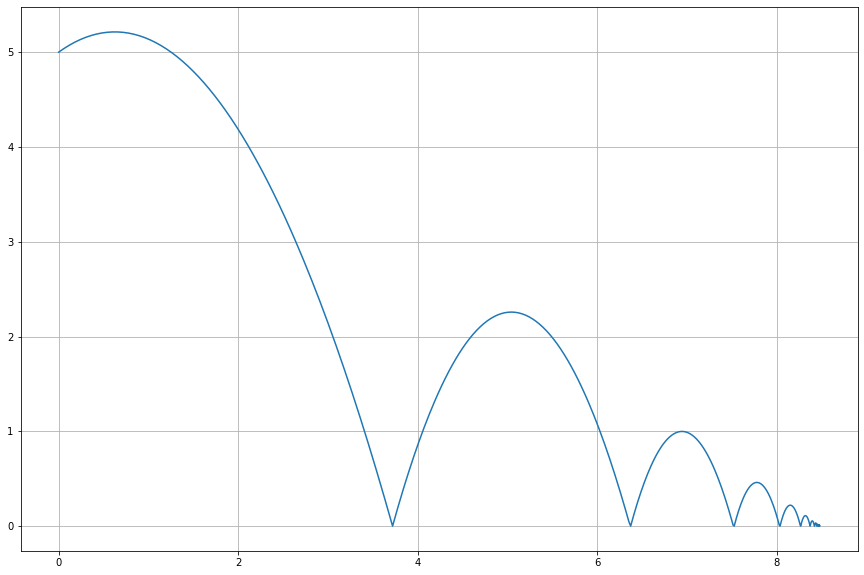

In [11]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot(pos[:,0], pos[:,1])
ax.grid()

In [14]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots(figsize = (10,10))

# These are the objects we need to keep track of.
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08)
ax.add_patch(ball)
ax.grid()
xdata, ydata = [], []

def init():
    """Initialize the animation figure."""
    ax.set_xlim((0,8))
    ax.set_ylim((0,8))
    ax.set_xlabel('$x$ /m')
    ax.set_ylabel('$y$ /m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    return line, ball

def animate(i):
    """For each frame, advance the animation to the new position, pos."""
    x, y = pos[i]
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    return line, ball

interval = 1000*dt
anim = animation.FuncAnimation(fig, animate, frames = tarr.size,
                               blit=True, interval=interval, repeat = False, init_func=init)
plt.close()

In [15]:
HTML(anim.to_html5_video())

In [45]:
anim.save('test.mp4', fps=30, dpi=100)